In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
data = pd.read_csv('Modified_Automobile_data.csv')

# Select the features (columns) that you want to include in the analysis
# Select numerical features that are relevant to price prediction
selected_features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]

# Create a new DataFrame with only the selected features
X = data[selected_features]

In [5]:
print(X.dtypes) #Printing a list of data types for all the columns in X

highway-mpg    float64
engine-size     object
horsepower     float64
curb-weight     object
dtype: object


In [6]:
# Replace non-numeric values with NaN
X['engine-size'] = pd.to_numeric(X['engine-size'], errors='coerce')

# Fill NaN values with appropriate imputation method (e.g., mean, median)
X['engine-size'].fillna(X['engine-size'].mean(), inplace=True)

<ipython-input-6-5c418151af8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['engine-size'] = pd.to_numeric(X['engine-size'], errors='coerce')
<ipython-input-6-5c418151af8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['engine-size'].fillna(X['engine-size'].mean(), inplace=True)


In [7]:
print(X.dtypes)

highway-mpg    float64
engine-size    float64
horsepower     float64
curb-weight     object
dtype: object


In [8]:
# Replace non-numeric values with NaN
X['curb-weight'] = pd.to_numeric(X['curb-weight'], errors='coerce')

# Fill NaN values with appropriate imputation method (e.g., mean, median)
X['curb-weight'].fillna(X['curb-weight'].mean(), inplace=True)

<ipython-input-8-795207925062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['curb-weight'] = pd.to_numeric(X['curb-weight'], errors='coerce')
<ipython-input-8-795207925062>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['curb-weight'].fillna(X['curb-weight'].mean(), inplace=True)


In [11]:
print(X.dtypes) #Checking the data types

highway-mpg    float64
engine-size    float64
horsepower     float64
curb-weight    float64
dtype: object


In [12]:
# Fill NaN values with appropriate imputation method (e.g., mean, median)
X['highway-mpg'].fillna(X['highway-mpg'].mean(), inplace=True)

<ipython-input-12-f4871d9fc43b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['highway-mpg'].fillna(X['highway-mpg'].mean(), inplace=True)


In [13]:
# Fill NaN values with appropriate imputation method (e.g., mean, median)
X['horsepower'].fillna(X['horsepower'].mean(), inplace=True)

<ipython-input-13-328a6839e281>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'].fillna(X['horsepower'].mean(), inplace=True)


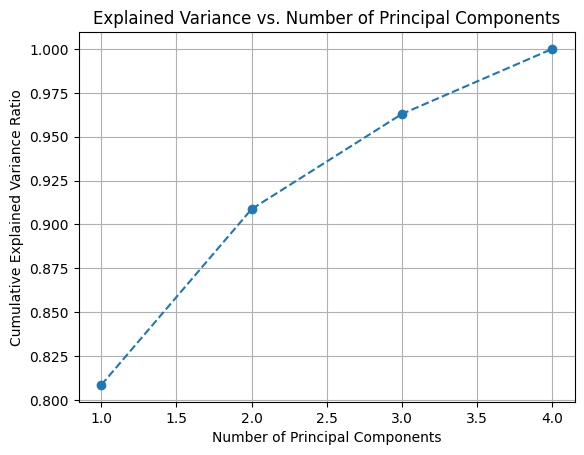

Number of Principal Components to Explain 75% of Variance: 1


In [14]:
# Standardize the feature matrix (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance ratio
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

# Find the number of principal components needed to explain at least 75% of the variance
n_components_75_percent = np.argmax(explained_variance_ratio_cumsum >= 0.75) + 1

print(f"Number of Principal Components to Explain 75% of Variance: {n_components_75_percent}")

# Get the principal components
principal_components = pca.components_[:n_components_75_percent]